<a href="https://colab.research.google.com/github/mjiii25/posco-academy/blob/main/Big-Data/Assignment-2/C1%EC%84%B1%EB%AF%BC%EC%A7%80_%EC%A2%85%ED%95%A9%EC%8B%A4%EC%8A%B5-2_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# from scipy.stats import skew, kurtosis


import graphviz

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [61]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [62]:
matplotlib.rc("font",family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False)

In [63]:
df_raw = pd.read_excel('/content/mydrive/MyDrive/1. 실습데이터 설명(Data Dictionary).xlsx', sheet_name = 'SCALE불량')

print(df_raw.shape)
df_raw.head()

(720, 21)


,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707.0,15109.0,14180.0,1호기,...,1144.0,116.0,1133.0,59.0,282.0,1133.0,934.0,적용,8.0,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707.0,15109.0,14180.0,1호기,...,1144.0,122.0,1135.0,53.0,283.0,1135.0,937.0,적용,8.0,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619.0,19181.0,18130.0,2호기,...,1129.0,116.0,1121.0,55.0,282.0,1121.0,889.0,적용,8.0,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619.0,19181.0,18130.0,2호기,...,1152.0,125.0,1127.0,68.0,316.0,1127.0,885.0,적용,8.0,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098.0,13334.0,12430.0,3호기,...,1140.0,134.0,1128.0,48.0,314.0,1128.0,873.0,적용,8.0,1조


In [64]:
df_raw['FUR_NO_ROW'] = df_raw['FUR_NO_ROW'].astype('object')

In [65]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLATE_NO           720 non-null    object 
 1   ROLLING_DATE       720 non-null    object 
 2   SCALE              720 non-null    object 
 3   SPEC               720 non-null    object 
 4   STEEL_KIND         720 non-null    object 
 5   PT_THK             720 non-null    float64
 6   PT_WDTH            720 non-null    float64
 7   PT_LTH             720 non-null    float64
 8   PT_WGT             720 non-null    float64
 9   FUR_NO             720 non-null    object 
 10  FUR_NO_ROW         720 non-null    object 
 11  FUR_HZ_TEMP        720 non-null    float64
 12  FUR_HZ_TIME        720 non-null    float64
 13  FUR_SZ_TEMP        720 non-null    float64
 14  FUR_SZ_TIME        720 non-null    float64
 15  FUR_TIME           720 non-null    float64
 16  FUR_EXTEMP         720 non

**결측치 확인하기**

In [66]:
df_raw.isnull().sum()

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

데이터셋에 결측치는 없는 것으로 보인다.

**이상치 처리하기**

In [86]:
# 연속형 변수와 범주형 변수 나누기

df_raw_num = df_raw[['PT_THK', 'PT_WDTH', 'PT_LTH', 'PT_WGT',
                    'FUR_HZ_TEMP', 'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME',
                    'FUR_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5', 'ROLLING_DESCALING']]

df_raw_cat = df_raw[['STEEL_KIND', 'FUR_NO', 'FUR_NO_ROW', 'HSB', 'WORK_GR']]                    

In [87]:
print(df_raw_num.shape)
df_raw_num.head()

(720, 12)


,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,32.25,3707.0,15109.0,14180.0,1144.0,116.0,1133.0,59.0,282.0,1133.0,934.0,8.0
1,32.25,3707.0,15109.0,14180.0,1144.0,122.0,1135.0,53.0,283.0,1135.0,937.0,8.0
2,33.27,3619.0,19181.0,18130.0,1129.0,116.0,1121.0,55.0,282.0,1121.0,889.0,8.0
3,33.27,3619.0,19181.0,18130.0,1152.0,125.0,1127.0,68.0,316.0,1127.0,885.0,8.0
4,38.33,3098.0,13334.0,12430.0,1140.0,134.0,1128.0,48.0,314.0,1128.0,873.0,8.0


In [88]:
print(df_raw_cat.shape)
df_raw_cat.head()

(720, 5)


,STEEL_KIND,FUR_NO,FUR_NO_ROW,HSB,WORK_GR
0,T1,1호기,1.0,적용,2조
1,T1,1호기,2.0,적용,2조
2,T8,2호기,1.0,적용,3조
3,T8,2호기,2.0,적용,3조
4,T8,3호기,1.0,적용,1조


In [89]:
# 각 변수의 이상치가 가지는 인덱스값 반환


def outlier_idx_detection(data) :

    outlier_indices = []
    for col in data.columns :
        q1, q3 = np.percentile(data[col], [25, 75])
        IQR = q3 - q1
        lower = q1 - 1.5 * IQR
        upper = q3 + 1.5 * IQR

        outlier_idx = data[(data[col] < lower) | (data[col] > upper)].index
        outlier_indices.append(list(outlier_idx))

    outlier_index = []
    for lst in outlier_indices :
        for i in range(len(lst)) :
            outlier_index.append(lst[i])

    return list(set(outlier_index))

In [90]:
outliers = outlier_idx_detection(df_raw_num)

print(len(outliers))
outliers

118


[512,
 513,
 514,
 515,
 516,
 517,
 518,
 519,
 521,
 523,
 524,
 525,
 526,
 527,
 528,
 529,
 530,
 531,
 532,
 533,
 534,
 535,
 536,
 537,
 538,
 539,
 540,
 541,
 542,
 543,
 544,
 545,
 546,
 547,
 548,
 549,
 550,
 551,
 552,
 553,
 554,
 555,
 556,
 557,
 558,
 559,
 560,
 561,
 562,
 563,
 564,
 565,
 566,
 567,
 568,
 569,
 570,
 572,
 573,
 574,
 575,
 576,
 85,
 86,
 87,
 88,
 89,
 106,
 640,
 641,
 157,
 184,
 185,
 41,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 351,
 354,
 355,
 357,
 437,
 438,
 442,
 444,
 447,
 448,
 449,
 450,
 454,
 456,
 460,
 461,
 463,
 469,
 473,
 475,
 481,
 489,
 492,
 493,
 494,
 495,
 496,
 500,
 501,
 505,
 506,
 507,
 508,
 509,
 510,
 511]

In [91]:
df_raw_num.drop(outliers, axis = 0, inplace = True)
df_raw_cat.drop(outliers, axis = 0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [92]:
print(df_raw_num.shape)
df_raw_num.head()

(602, 12)


,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,32.25,3707.0,15109.0,14180.0,1144.0,116.0,1133.0,59.0,282.0,1133.0,934.0,8.0
1,32.25,3707.0,15109.0,14180.0,1144.0,122.0,1135.0,53.0,283.0,1135.0,937.0,8.0
2,33.27,3619.0,19181.0,18130.0,1129.0,116.0,1121.0,55.0,282.0,1121.0,889.0,8.0
3,33.27,3619.0,19181.0,18130.0,1152.0,125.0,1127.0,68.0,316.0,1127.0,885.0,8.0
4,38.33,3098.0,13334.0,12430.0,1140.0,134.0,1128.0,48.0,314.0,1128.0,873.0,8.0


In [94]:
print(df_raw_cat.shape)
df_raw_cat.head()

(602, 5)


,STEEL_KIND,FUR_NO,FUR_NO_ROW,HSB,WORK_GR
0,T1,1호기,1.0,적용,2조
1,T1,1호기,2.0,적용,2조
2,T8,2호기,1.0,적용,3조
3,T8,2호기,2.0,적용,3조
4,T8,3호기,1.0,적용,1조


### **연속형 변수의 분포 확인하기**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48520 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_te

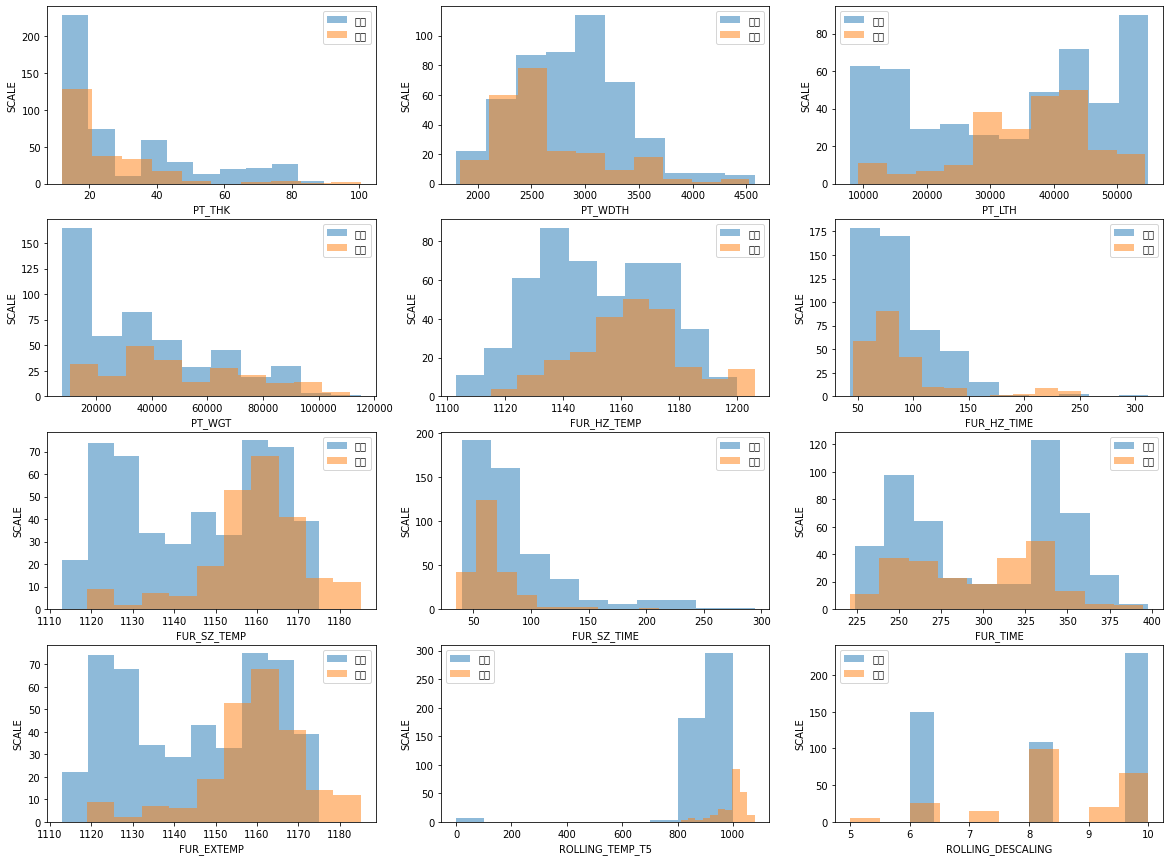

In [13]:
num = 0
fig = plt.figure(figsize = (20, 15))


for col in df_raw_num.columns:
    plt.subplot(4, 3, num+1)
    num += 1
    plt.hist(df_raw[df_raw["SCALE"] == '양품'][col], label = "양품", alpha = 0.5)
    plt.hist(df_raw[df_raw["SCALE"] == '불량'][col], label = "불량", alpha = 0.5)
    plt.xlabel(col)
    plt.ylabel("SCALE")
    plt.legend()
plt.show()

- PT_THK, PT_WDTH, PT_LTH, FUR_HZ_TEMP, FUR_HZ_TIME, FUR_SZ_TEMP, FUR_SZ_TIME, FUR_EXTEMP에 따라 scale의 불량 여부가 영향을 받는다.
- 후판 지시두께가 두꺼울수록, 후판 지시폭이 넓을수록, 후판 지시길이가 길수록, 가열로 가열대 소재온도가 높을수록, 가열로 가열대 재로시간이 짧을수록, 가열로 균열대 소재온도가 높을수록, 가열로 균열대 재로시간이 짧을수록, 가열로 추출온도가 높을수록 불량률이 커진다.

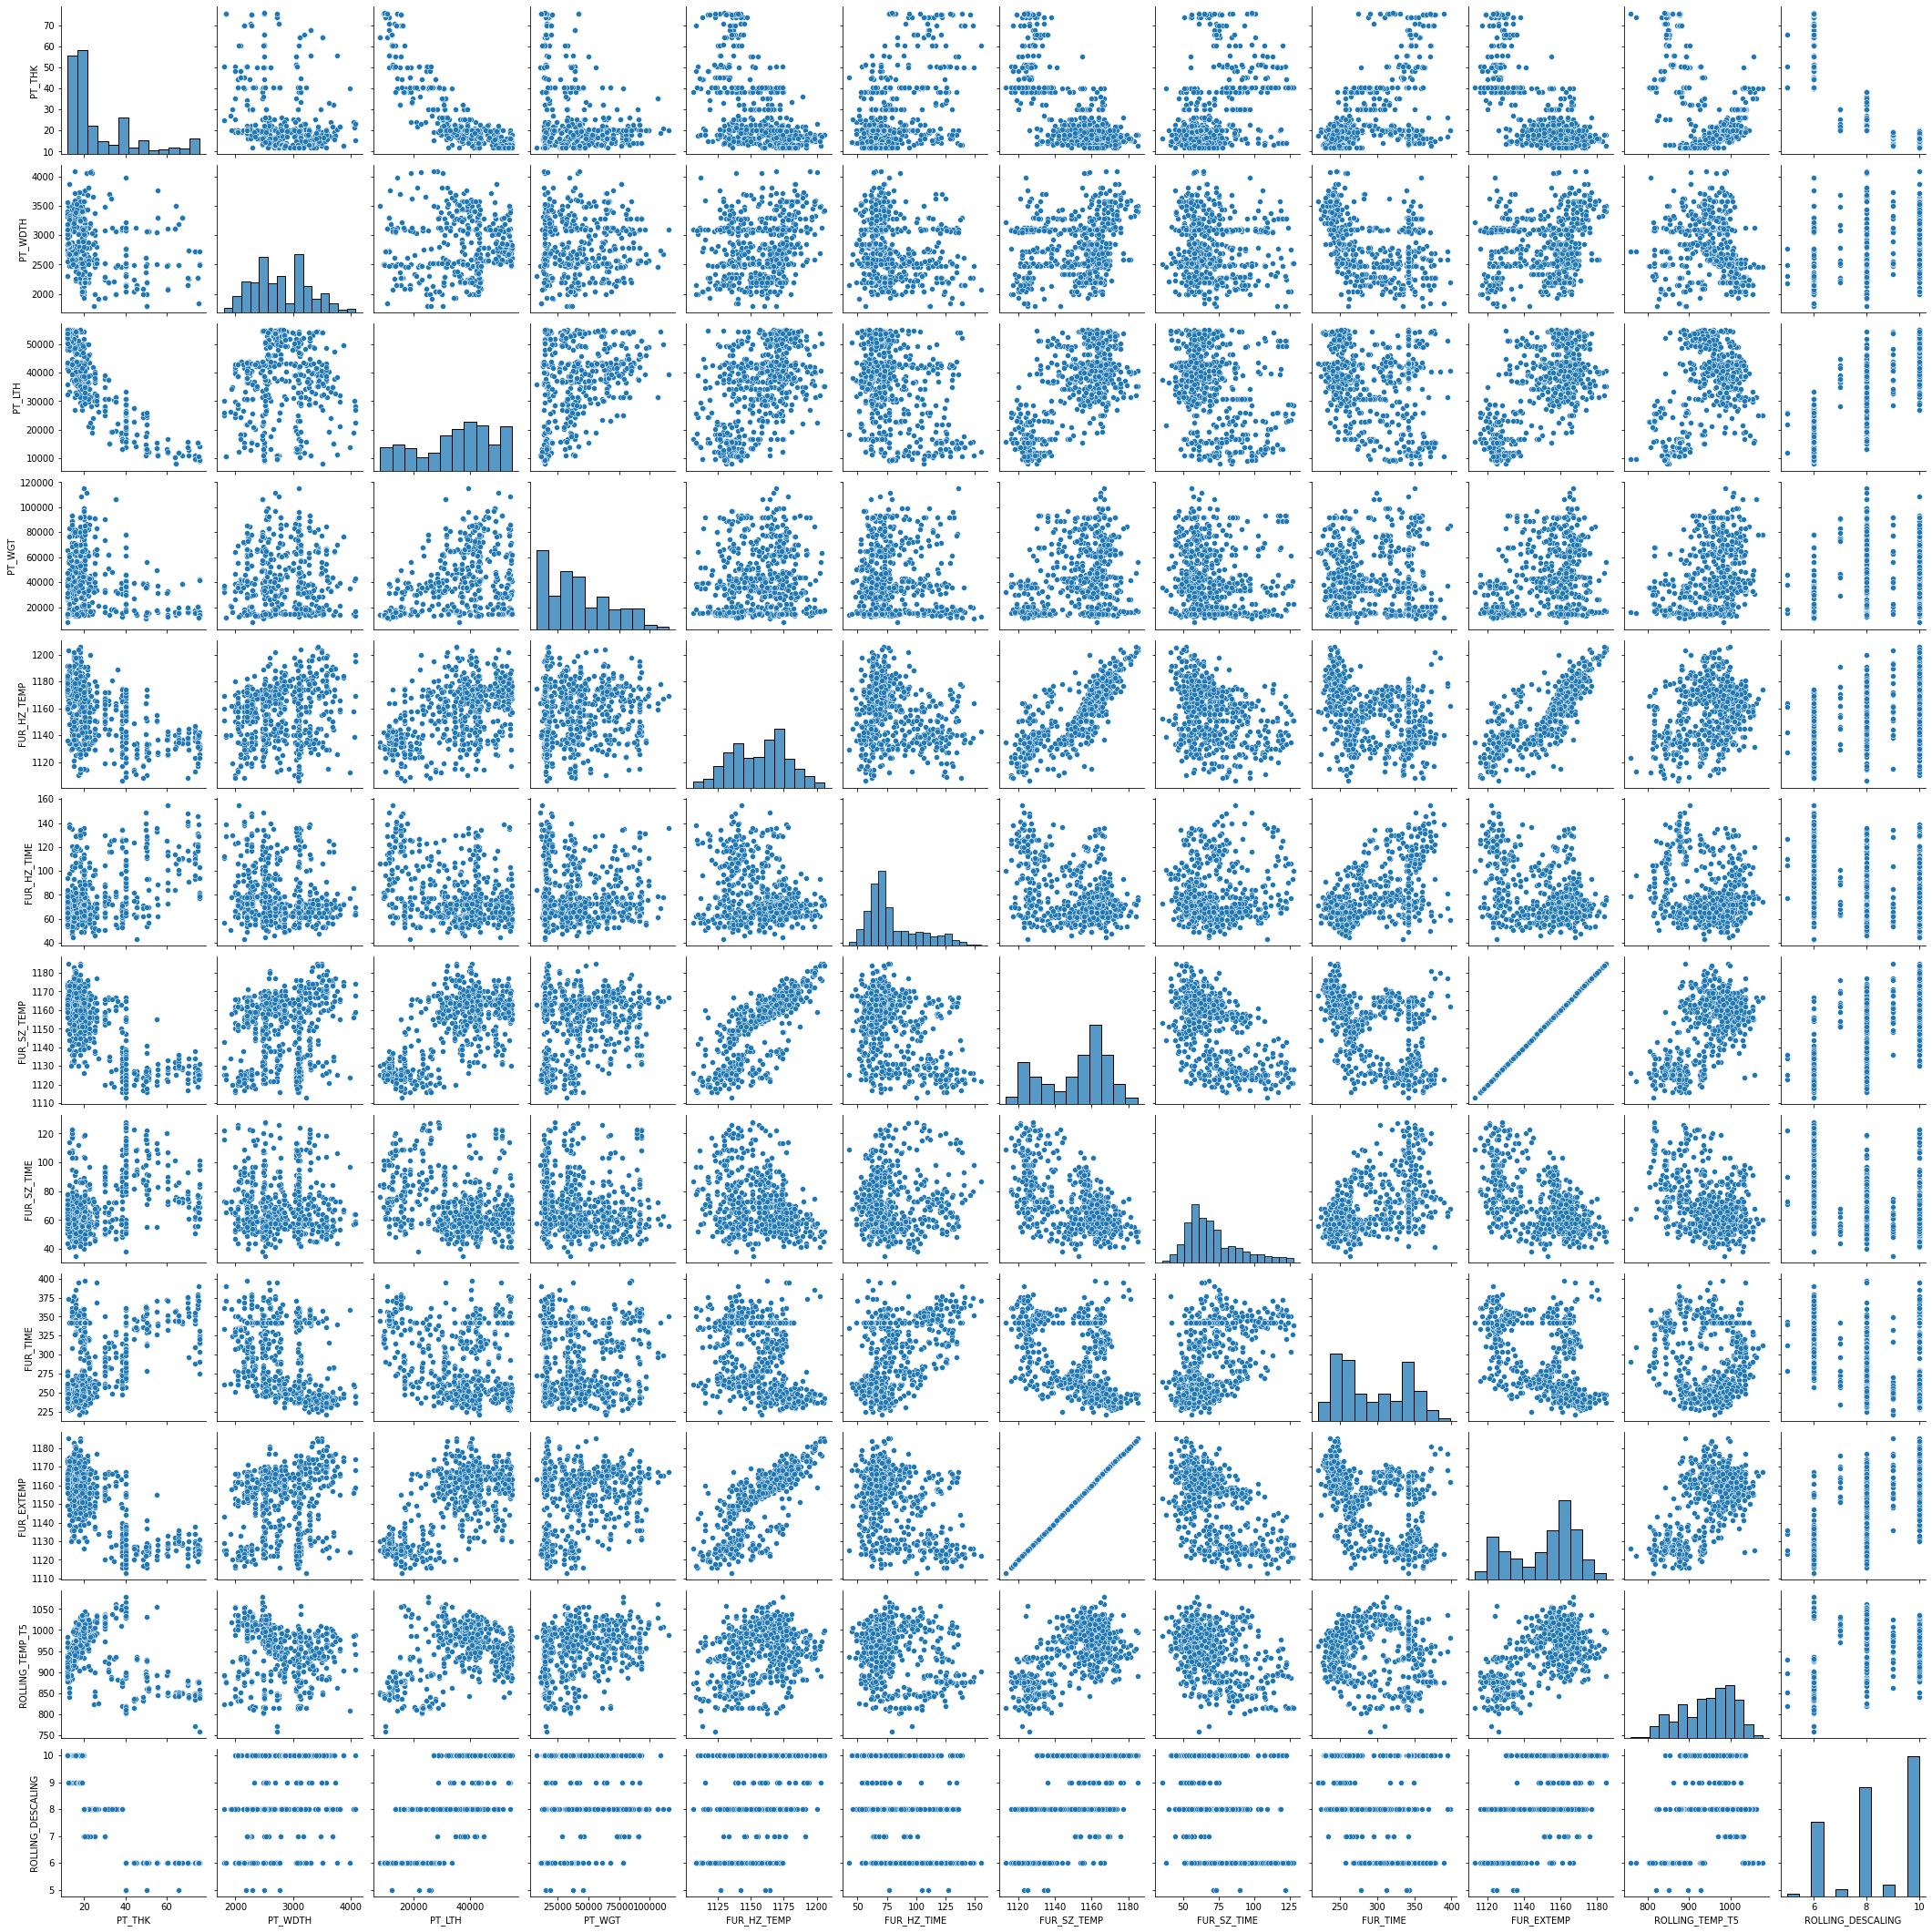

In [28]:
sns.pairplot(df_raw_num)

### **범주형 변수 분포 확인하기**

In [14]:
print(df_raw_cat.shape)
df_raw_cat.head()

(720, 5)


,STEEL_KIND,FUR_NO,FUR_NO_ROW,HSB,WORK_GR
0,T1,1호기,1.0,적용,2조
1,T1,1호기,2.0,적용,2조
2,T8,2호기,1.0,적용,3조
3,T8,2호기,2.0,적용,3조
4,T8,3호기,1.0,적용,1조


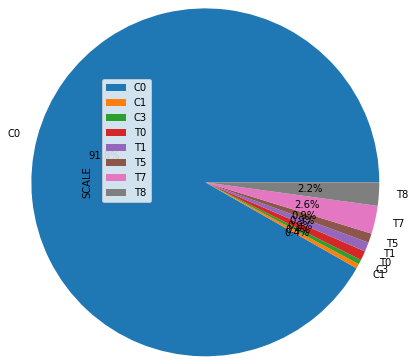

In [15]:
ds_sub = df_raw[df_raw["SCALE"] == '불량']
ds_count = ds_sub.groupby("STEEL_KIND", as_index = False).agg("count")
ds_count.plot.pie(y = "SCALE", labels = ds_count["STEEL_KIND"], autopct= "%.1f%%", radius = 2)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)


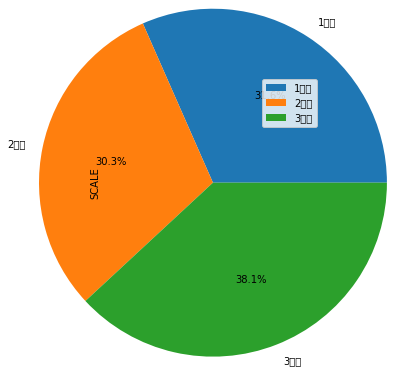

In [16]:
ds_sub = df_raw[df_raw["SCALE"] == '불량']
ds_count = ds_sub.groupby("FUR_NO", as_index = False).agg("count")
ds_count.plot.pie(y = "SCALE", labels = ds_count["FUR_NO"], autopct= "%.1f%%", radius = 2)

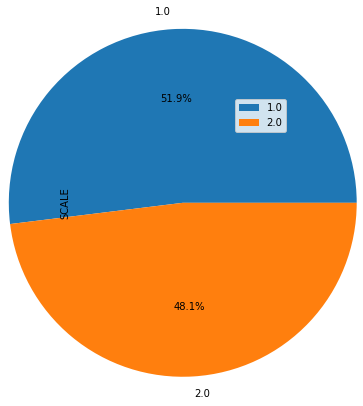

In [17]:
ds_sub = df_raw[df_raw["SCALE"] == '불량']
ds_count = ds_sub.groupby("FUR_NO_ROW", as_index = False).agg("count")
ds_count.plot.pie(y = "SCALE", labels = ds_count["FUR_NO_ROW"], autopct= "%.1f%%", radius = 2)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text

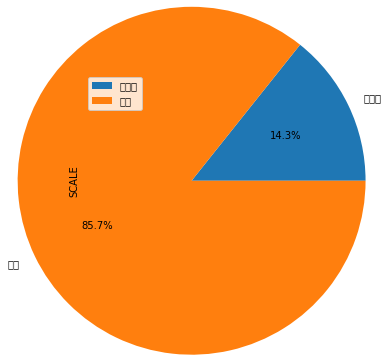

In [18]:
ds_sub = df_raw[df_raw["SCALE"] == '불량']
ds_count = ds_sub.groupby("HSB", as_index = False).agg("count")
ds_count.plot.pie(y = "SCALE", labels = ds_count["HSB"], autopct= "%.1f%%", radius = 2)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0, flags=flags)


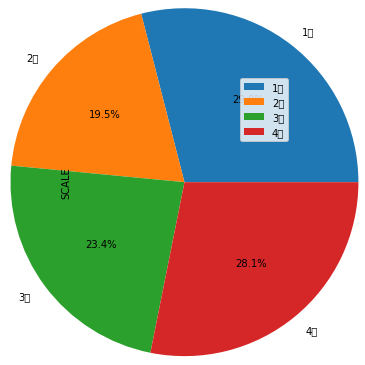

In [19]:
ds_sub = df_raw[df_raw["SCALE"] == '불량']
ds_count = ds_sub.groupby("WORK_GR", as_index = False).agg("count")
ds_count.plot.pie(y = "SCALE", labels = ds_count["WORK_GR"], autopct= "%.1f%%", radius = 2)

범주형 변수의 파이 차트를 해석한 결과는 다음과 같다 :

- 후판강종이 C0일 때 불량률이 크다.
- 가열로 호기에 따른 불량여부의 차이는 없다.
- 가열로 장입열 구분에 따른 불량여부의 차이는 없다.
- HSB를 적용하지 않은 경우 불량률이 크다.
- 작업조에 따른 불량여부의 차이는 없다.

In [20]:
df_raw_cat['STEEL_KIND'].value_counts()

C0    503
T8     95
T5     43
T7     35
T1     18
T0     16
C3      7
T3      2
C1      1
Name: STEEL_KIND, dtype: int64

In [21]:
df_raw_cat.loc[df_raw_cat['STEEL_KIND'] == 'C0', 'STEEL_KIND'] = 'C'
df_raw_cat.loc[df_raw_cat['STEEL_KIND'] == 'C1', 'STEEL_KIND'] = 'C'
df_raw_cat.loc[df_raw_cat['STEEL_KIND'] == 'C3', 'STEEL_KIND'] = 'C'

df_raw_cat.loc[df_raw_cat['STEEL_KIND'] == 'T0', 'STEEL_KIND'] = 'T'
df_raw_cat.loc[df_raw_cat['STEEL_KIND'] == 'T1', 'STEEL_KIND'] = 'T'
df_raw_cat.loc[df_raw_cat['STEEL_KIND'] == 'T3', 'STEEL_KIND'] = 'T'
df_raw_cat.loc[df_raw_cat['STEEL_KIND'] == 'T5', 'STEEL_KIND'] = 'T'
df_raw_cat.loc[df_raw_cat['STEEL_KIND'] == 'T7', 'STEEL_KIND'] = 'T'
df_raw_cat.loc[df_raw_cat['STEEL_KIND'] == 'T8', 'STEEL_KIND'] = 'T'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [22]:
df_raw_cat['STEEL_KIND'].value_counts()

C    511
T    209
Name: STEEL_KIND, dtype: int64

In [23]:
df_raw_cat['FUR_NO'].value_counts()

3호기    243
1호기    240
2호기    237
Name: FUR_NO, dtype: int64

In [24]:
df_raw_cat['FUR_NO_ROW'].value_counts()

1.0    362
2.0    358
Name: FUR_NO_ROW, dtype: int64

In [25]:
df_raw_cat['HSB'].value_counts()

적용     687
미적용     33
Name: HSB, dtype: int64

In [26]:
df_raw_cat['WORK_GR'].value_counts()

4조    194
1조    189
3조    172
2조    165
Name: WORK_GR, dtype: int64

**<결론>**

EDA를 통해 확인한 결과는 다음과 같다.

| 연속형 변수  | 범주형 변수 |
|:-----------:|:-----------:|
|PT_THK | STEEL_KIND = 'C0' |
|PT_WDTH | HSB |
|PT_LTH | |
|FUR_HZ_TEMP | |
|FUR_HZ_TIME | |
|FUR_SZ_TEMP | |
|FUR_SZ_TIME | |
|FUR_EXTEMP | |

- 연속형 변수
    - PT_THK, PT_WDTH, PT_LTH, FUR_HZ_TEMP, FUR_SZ_TEMP, 그리고 FUR_EXTEMP가 클수록 불량률 또한 커진다.
    - FUR_HZ_TIME과 FUR_SZ_TIME이 작을수록 불량률이 커진다.

- 범주형 변수
    - STEEL_KIND = 'C', HSB = '미적용'일 때 불량률이 크다.

### **데이터 더미 생성하기 및 분할하기**

In [96]:
print(df_raw_num.shape)
df_raw_num.head()

(602, 12)


,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,32.25,3707.0,15109.0,14180.0,1144.0,116.0,1133.0,59.0,282.0,1133.0,934.0,8.0
1,32.25,3707.0,15109.0,14180.0,1144.0,122.0,1135.0,53.0,283.0,1135.0,937.0,8.0
2,33.27,3619.0,19181.0,18130.0,1129.0,116.0,1121.0,55.0,282.0,1121.0,889.0,8.0
3,33.27,3619.0,19181.0,18130.0,1152.0,125.0,1127.0,68.0,316.0,1127.0,885.0,8.0
4,38.33,3098.0,13334.0,12430.0,1140.0,134.0,1128.0,48.0,314.0,1128.0,873.0,8.0


In [97]:
print(df_raw_cat.shape)
df_raw_cat.head()

(602, 5)


,STEEL_KIND,FUR_NO,FUR_NO_ROW,HSB,WORK_GR
0,T1,1호기,1.0,적용,2조
1,T1,1호기,2.0,적용,2조
2,T8,2호기,1.0,적용,3조
3,T8,2호기,2.0,적용,3조
4,T8,3호기,1.0,적용,1조


In [98]:
df_raw_num_vital = df_raw_num[['PT_THK', 'PT_WDTH', 'PT_LTH', 'FUR_HZ_TEMP', 'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_EXTEMP']]
df_raw_cat_vital = df_raw_cat[['STEEL_KIND', 'HSB']]

In [99]:
df_raw_y = df_raw['SCALE'].drop(outliers, axis = 0)

In [101]:
print(df_raw_y.shape)
df_raw_y.head()

(602,)


0    양품
1    양품
2    양품
3    양품
4    양품
Name: SCALE, dtype: object

In [103]:
df_raw_vital = df_raw_num_vital.join(df_raw_cat_vital, how='left')

print(df_raw_vital.shape)
df_raw_vital.head()

(602, 10)


,PT_THK,PT_WDTH,PT_LTH,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_EXTEMP,STEEL_KIND,HSB
0,32.25,3707.0,15109.0,1144.0,116.0,1133.0,59.0,1133.0,T1,적용
1,32.25,3707.0,15109.0,1144.0,122.0,1135.0,53.0,1135.0,T1,적용
2,33.27,3619.0,19181.0,1129.0,116.0,1121.0,55.0,1121.0,T8,적용
3,33.27,3619.0,19181.0,1152.0,125.0,1127.0,68.0,1127.0,T8,적용
4,38.33,3098.0,13334.0,1140.0,134.0,1128.0,48.0,1128.0,T8,적용


In [104]:
df_raw_vital_dummy = pd.get_dummies(df_raw_vital)

In [105]:
print(df_raw_vital_dummy.shape)
df_raw_vital_dummy.head()

(602, 19)


,PT_THK,PT_WDTH,PT_LTH,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_EXTEMP,STEEL_KIND_C0,STEEL_KIND_C1,STEEL_KIND_C3,STEEL_KIND_T0,STEEL_KIND_T1,STEEL_KIND_T3,STEEL_KIND_T5,STEEL_KIND_T7,STEEL_KIND_T8,HSB_미적용,HSB_적용
0,32.25,3707.0,15109.0,1144.0,116.0,1133.0,59.0,1133.0,0,0,0,0,1,0,0,0,0,0,1
1,32.25,3707.0,15109.0,1144.0,122.0,1135.0,53.0,1135.0,0,0,0,0,1,0,0,0,0,0,1
2,33.27,3619.0,19181.0,1129.0,116.0,1121.0,55.0,1121.0,0,0,0,0,0,0,0,0,1,0,1
3,33.27,3619.0,19181.0,1152.0,125.0,1127.0,68.0,1127.0,0,0,0,0,0,0,0,0,1,0,1
4,38.33,3098.0,13334.0,1140.0,134.0,1128.0,48.0,1128.0,0,0,0,0,0,0,0,0,1,0,1


In [106]:
df_raw_y[df_raw_y == '불량'] = 1
df_raw_y[df_raw_y == '양품'] = 0

In [107]:
print(df_raw_y.shape)
df_raw_y.value_counts()

(602,)


0    405
1    197
Name: SCALE, dtype: int64

In [108]:
print(df_raw_vital_dummy.shape)
df_raw_vital_dummy.head()

(602, 19)


,PT_THK,PT_WDTH,PT_LTH,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_EXTEMP,STEEL_KIND_C0,STEEL_KIND_C1,STEEL_KIND_C3,STEEL_KIND_T0,STEEL_KIND_T1,STEEL_KIND_T3,STEEL_KIND_T5,STEEL_KIND_T7,STEEL_KIND_T8,HSB_미적용,HSB_적용
0,32.25,3707.0,15109.0,1144.0,116.0,1133.0,59.0,1133.0,0,0,0,0,1,0,0,0,0,0,1
1,32.25,3707.0,15109.0,1144.0,122.0,1135.0,53.0,1135.0,0,0,0,0,1,0,0,0,0,0,1
2,33.27,3619.0,19181.0,1129.0,116.0,1121.0,55.0,1121.0,0,0,0,0,0,0,0,0,1,0,1
3,33.27,3619.0,19181.0,1152.0,125.0,1127.0,68.0,1127.0,0,0,0,0,0,0,0,0,1,0,1
4,38.33,3098.0,13334.0,1140.0,134.0,1128.0,48.0,1128.0,0,0,0,0,0,0,0,0,1,0,1


In [109]:
print(df_raw_y.shape)
df_raw_y.head()

(602,)


0    0
1    0
2    0
3    0
4    0
Name: SCALE, dtype: object

### **의사결정나무 (Decision Tree) 모델링하기**

In [ ]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, 
                                                                df_raw_y, 
                                                                test_size = 0.4, 
                                                                random_state = 1234)

print('df_train_x size : {}'.format(df_train_x.shape))
print('df_test_x size : {}'.format(df_test_x.shape))
print('df_train_y size : {}'.format(df_train_y.shape))
print('df_test_y size : {}'.format(df_test_y.shape))

df_train_x size : (192, 30)
df_test_x size : (128, 30)
df_train_y size : (192,)
df_test_y size : (128,)


Over-sampling한 데이터셋 df_resampled를 train : test = 6 : 4 로 분할한다.

### **모델 생성하기**

In [ ]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.883


만들어진 의사결정나무 모델은 train과 test 데이터에 대해 각각 100%, 88.3%의 설명력을 갖는다. train 데이터에 있어서 과대적합되는 현상이 일어난 것으로 보인다.

### **모델 파라미터 설정하기 : max_depth**

In [ ]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth :
    tree = DecisionTreeClassifier(random_state = 1234,
                                  max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainScore'] = train_accuracy
df_accuracy_depth['TestScore'] = test_accuracy

In [ ]:
df_accuracy_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.932,0.852
1,2,0.979,0.875
2,3,0.995,0.875
3,4,1.000,0.883
4,5,1.000,0.883
5,6,1.000,0.883
6,7,1.000,0.883
7,8,1.000,0.883
8,9,1.000,0.883
9,10,1.000,0.883


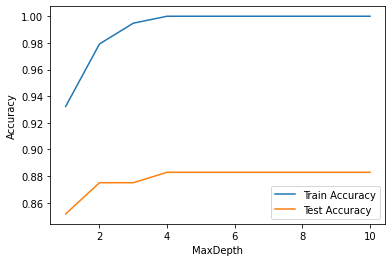

In [ ]:
plt.plot(para_depth, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('MaxDepth')
plt.legend()